In [1]:
import string
from arviz import hdi
import pyabc
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix2
import scipy
import numpy as np
from pyabc.visualization import plot_kde_matrix_highlevel
from datetime import datetime
import pandas as pd
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix
import matplotlib.pyplot as plt
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix, plot_kde_2d

output_path = '../../figures'
path = '/Users/adsurbum/sim-data/single-model-abc/new4'
file_name = '2022-03-24-10kreps'

history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,file_name))
history.get_all_populations()

,t,population_end_time,samples,epsilon,particles
0,-1,2022-03-27 00:03:54.275604,200,inf,1
1,0,2022-03-31 20:52:51.254365,399,0.772319,200
2,1,2022-04-01 20:51:16.807562,7393,0.412007,944
3,2,2022-04-03 05:39:11.314263,10074,0.211183,1128
4,3,2022-04-04 19:58:30.287305,14464,0.150479,1136
5,4,2022-04-08 02:16:18.835219,26399,0.132524,1040


In [2]:
r4 = '2022-01-11-tau1-r4-22-10cpu' #it doesn't go lower than 0.320312, in another run too
r10 = '2022-01-04-tau1-r10-22' 
r100 = '2022-01-04-tau1-r100-22' 
r1k = '2021-12-29-an200-k1'
r1k_2 = '2022-01-11-tau1-r1000-33-10cpu'
r10k = '2022-03-24-10kreps'
allf = [r4, r10, r100, r1k, r1k_2, r10k]
labels = ['4 reps','10 reps','100 reps','1000 reps, run 1','1000 reps, run 2','10000 reps']
print('checking termination epsilon for each run')
for i in allf:
    history = pyabc.History("sqlite:////Users/adsurbum/sim-data/single-model-abc/new4/{0}/{0}.db"
                        .format(i))
    print(i, round(history.get_all_populations()['epsilon'].values[-1],5))

checking termination epsilon for each run
2022-01-11-tau1-r4-22-10cpu 0.32031
2022-01-04-tau1-r10-22 0.1552
2022-01-04-tau1-r100-22 0.1277
2021-12-29-an200-k1 0.12659
2022-01-11-tau1-r1000-33-10cpu 0.19674
2022-03-24-10kreps 0.13252


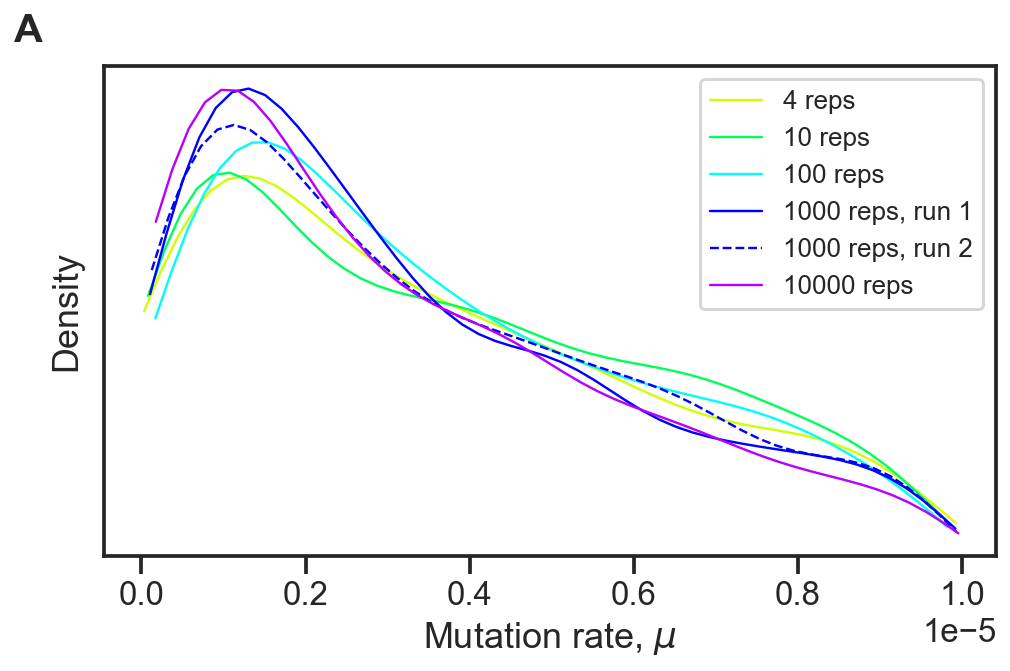

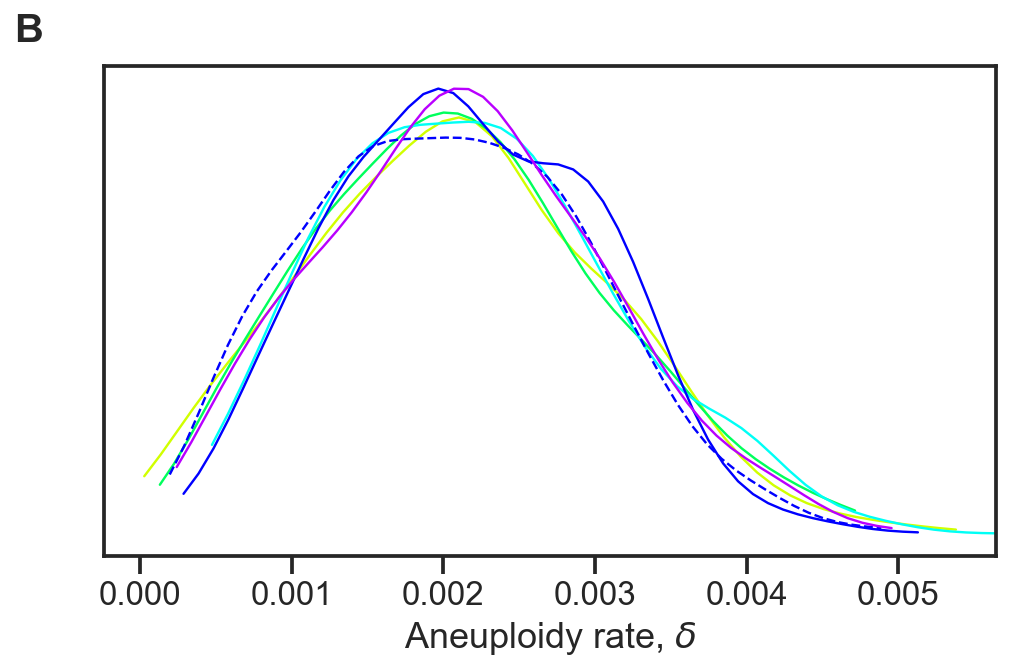

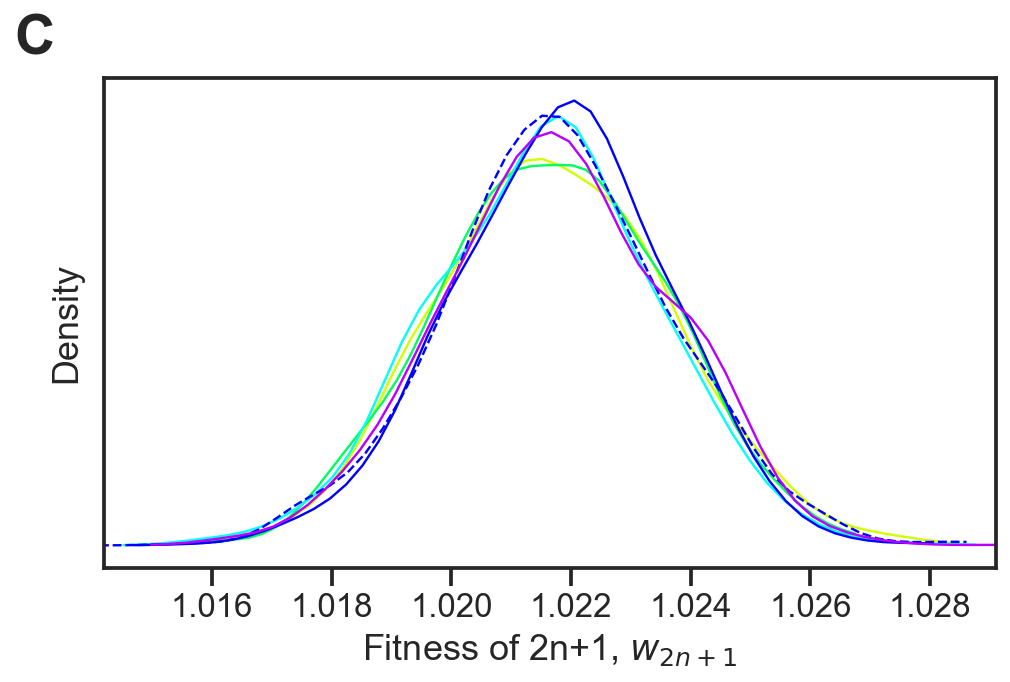

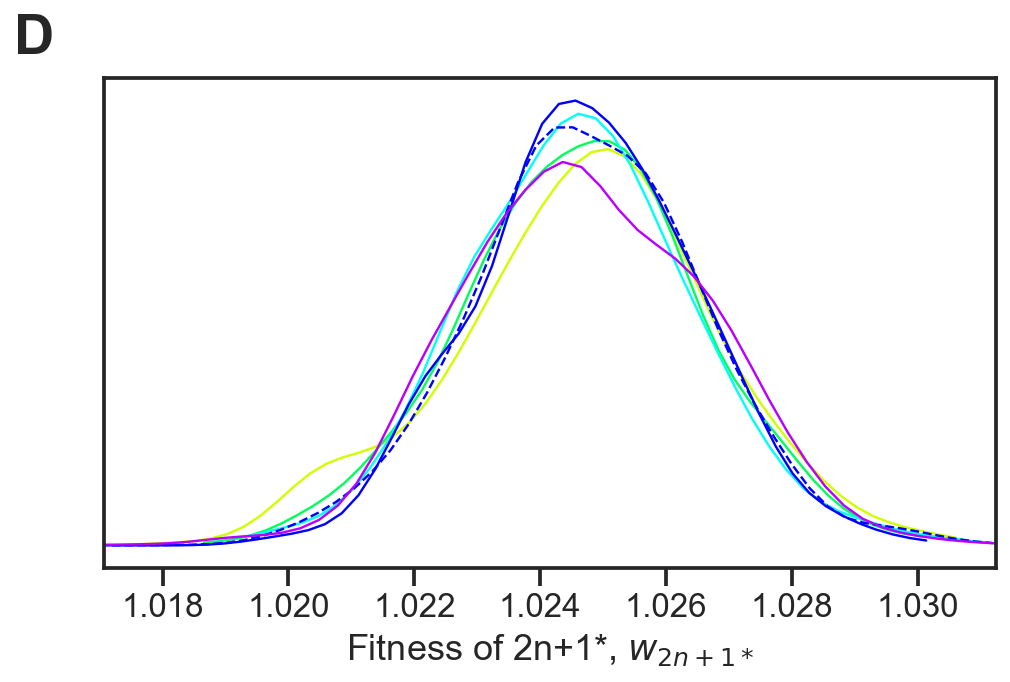

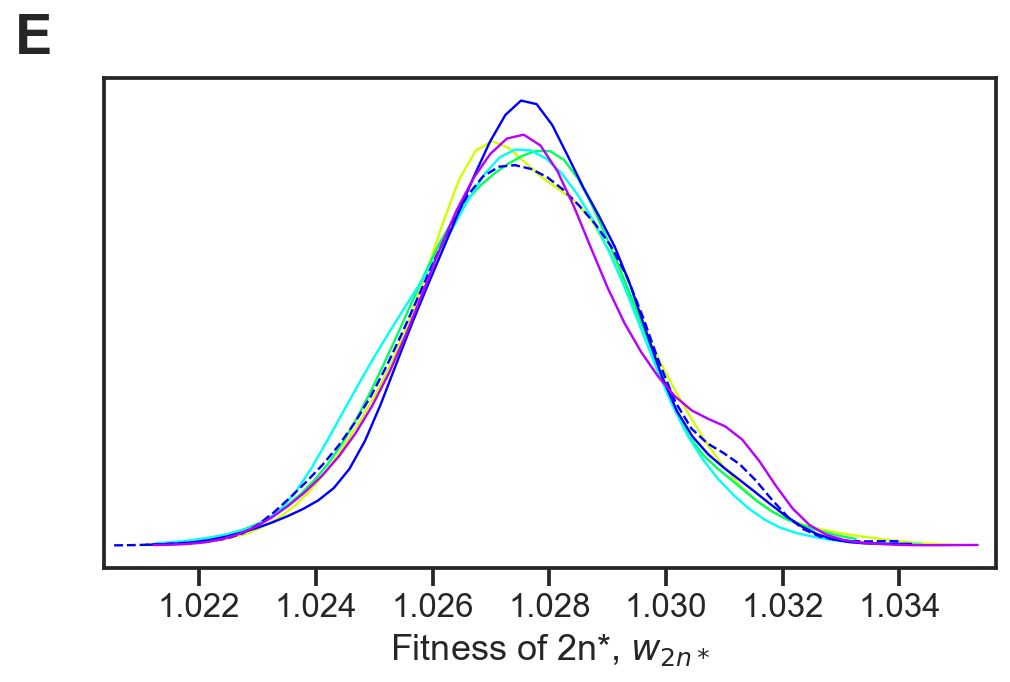

In [3]:
import seaborn as sns
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.2, 'lines.markersize': 7})
from matplotlib import cm
def compare(files, p, c, labels, ax):
    cm_subsection = np.linspace(0.2, 0.8, len(labels)) 
    colors = [cm.hsv(0.2),cm.hsv(0.4),cm.hsv(0.5), 'blue', 'blue', cm.hsv(0.8)]
    colors[-2] = colors[-3] = 'blue'
    linestyles = ['solid']*len(labels)
    linestyles[-2] = 'dashed'
    for f ,l, color, lstyle in zip(files,labels,colors,linestyles):
        history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f))
        df, w = history.get_distribution(m=0, t=None)
        pyabc.visualization.plot_kde_1d(
            df,
            w,
            x=p,
            xname=c,
            ax=ax,
            label=f"{l}",
            color=color,
            linestyle=lstyle
        )

        
history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,r1k))
samples, weights = history.get_distribution(m=0, t=None)
c = ['Mutation rate, $\mu$', 'Aneuploidy rate, $\delta$', 'Fitness of 2n+1, $w_{2n+1}$', 
     'Fitness of 2n+1*, $w_{2n+1*}$', 'Fitness of 2n*, $w_{2n*}$']
p_to_c = {p:c for p,c in zip(list(samples.columns),c)} #param name of samples to column name that should be shown

i=-1
allf = [r4, r10, r100, r1k, r1k_2, r10k]
labels = ['4 reps','10 reps','100 reps','1000 reps, run 1','1000 reps, run 2','10000 reps']

for p in samples.columns.values:
    i+=1
    fig, ax = plt.subplots(figsize=(8,4.5))
    compare(allf, p, p_to_c[p], labels, ax)
    ax.text(-0.1, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20 if i<2 else 28, weight='bold')
    ax.set_ylabel("Density" if (i==0 or i==2) else "",labelpad=10)
    ax.axes.yaxis.set_ticks([])
    if i==0:
        ax.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=13);
    plt.gcf().savefig(f'{output_path}/runs-{string.ascii_uppercase[i]}.pdf', bbox_inches='tight', dpi=100)